In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exploration 

In [2]:
data2 = pd.read_csv('daily_traffic.csv')
data2 = data2.dropna()
data2.head()

,date_time,traffic_volume
0,9/29/2016 17:00,5551.0
1,9/29/2016 18:00,4132.0
2,9/29/2016 19:00,3435.0
3,9/29/2016 20:00,2765.0
4,9/29/2016 21:00,2443.0


In [3]:
data = data2[5000:10000]
data

,date_time,traffic_volume
5000,11-04-2013 14:00,4562
5001,11-04-2013 15:00,4797
5002,11-04-2013 16:00,5668
5003,11-04-2013 17:00,5029
5004,11-04-2013 18:00,3803
...,...,...
9995,20-11-2013 04:00,811
9996,20-11-2013 05:00,2832
9997,20-11-2013 06:00,5990
9998,20-11-2013 07:00,7107


In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

# plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(data['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(7, 400, 24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## Modeling 

In [4]:
y = data['traffic_volume']

fh = np.arange(1, 168)

In [ ]:
#pip install sktime

In [5]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=168)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='--', label='Test')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volu,e')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

### Baseline 

In [6]:
y_pred_baseline = y_train[-168:].values

### BATS 

In [ ]:
#pip install sktime[all_extras]

In [ ]:
#pip install tbats

In [7]:
from sktime.forecasting.bats import BATS

forecaster = BATS(use_box_cox=True,
                  use_trend=False,
                  use_damped_trend=False,
                  sp=[24, 168])
forecaster.fit(y_train)

y_pred_BATS = forecaster.predict(fh)

### TBATS 

In [8]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(use_box_cox=True,
                   use_trend=False,
                   use_damped_trend=False,
                   sp=[24, 168])
forecaster.fit(y_train)

y_pred_TBATS = forecaster.predict(fh)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='-', label='Test')
ax.plot(y_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_pred_BATS, ls='--', label='BATS')
ax.plot(y_pred_TBATS, ls='-.', label='TBATS')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volume')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(y_train, ls='-', label='Train')
ax.plot(y_test, ls='-', label='Test')
ax.plot(y_test.index, y_pred_baseline, ls=':', label='Baseline')
ax.plot(y_pred_BATS, ls='--', label='BATS')
ax.plot(y_pred_TBATS, ls='-.', label='TBATS')
ax.set_xlabel('time')
ax.set_ylabel('Daily traffic volume')
ax.legend(loc='best')

fig.autofmt_xdate()
plt.tight_layout()

plt.xlim(800, 1000)
plt.ylim(0, 8000)

plt.show()

In [13]:
def mae(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred))),2)

In [14]:
mae_baseline = mae(y_test, y_pred_baseline)
mae_BATS = mae(y_test, y_pred_BATS)
mae_TBATS = mae(y_test, y_pred_TBATS)

print(f'MAE from baseline: {mae_baseline}')
print(f'MAE from BATS: {mae_BATS}')
print(f'MAE from TBATS: {mae_TBATS}')

MAE from baseline: 2403.29
MAE from BATS: 1793.81
MAE from TBATS: 1793.81


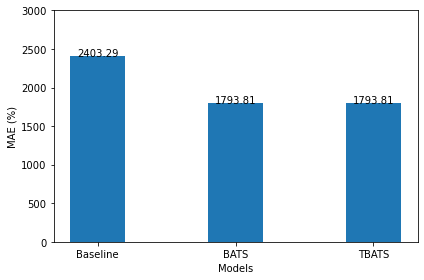

In [16]:
fig, ax = plt.subplots()

x = ['Baseline', 'BATS', 'TBATS']
y = [mae_baseline, mae_BATS, mae_TBATS]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE (%)')
ax.set_ylim(0, 3000)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()